# Trabajo Practico 2 - Matrices de Insumo Producto

## Enunciado

### Consigna 1 -

Queremos demostrar que si se cumple la siguiente igualdad:

$$
(\mathbf{I - A})^{-1} = \mathbf{I} + \mathbf{A} + \mathbf{A^{2}} + \ldots + \mathbf{A^{n}} + \ldots
$$

Entonces vale que:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = 0
$$

Definimos:

$$
S_n = \mathbf{I} + \mathbf{A} + \mathbf{A^2} + \ldots + \mathbf{A^n}
$$

Multiplicando a izquierda a ambos lados por $(\mathbf{I - A})$, tenemos:

$$
(\mathbf{I - A}) S_n = (\mathbf{I - A}) \left(\mathbf{I} + \mathbf{A} + \mathbf{A^2} + \ldots + \mathbf{A^n}\right)
$$

De aquí obtenemos:

$$
(\mathbf{I - A}) S_n = \mathbf{I} - \mathbf{A^{n+1}}
$$

Por lo tanto, podemos expresar:

$$
\mathbf{A^{n+1}} = \mathbf{I} - (\mathbf{I - A}) S_n
$$

Ahora calculemos $\lim_{n \to \infty} \mathbf{A}^{n+1}$

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \lim_{n \to \infty} \mathbf{I} - (\mathbf{I - A}) S_n 
$$

Por álgebra de límites:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \lim_{n \to \infty} \mathbf{I} - (\lim_{n \to \infty}(\mathbf{I - A}) . \lim_{n \to \infty} S_n) 
$$

Como suponemos que $(\mathbf{I - A})^{-1} = \lim_{n \to \infty} S_n$, llegamos a:

$$
\lim_{n \to \infty} \mathbf{A}^{n+1} = \mathbf{I} - (\mathbf{I - A} . \mathbf{I - A})^{-1}) = 0
$$



### Consigna 2 -


In [5]:

import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from funcionesTP1 import *

In [ ]:
#Definimos las matrices:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)

In [7]:
#Definimos función para calcular los vectores:

def vector_generator(A, n):
    v = np.zeros(n)
    
    for i in range (n):
        A_elev = elevar_matriz(A, i+1 )
        v[i] = np.linalg.norm(A_elev, 2)
    
    return v

def elevar_matriz (A, n):
    res = np.eye(np.shape(A)[0])

    for i in range (n):
        res = res @ A

    return res 

In [8]:
#Generamos los vectores pedidos:
a1 = vector_generator(A1,250)

a2 = vector_generator(A2, 250)

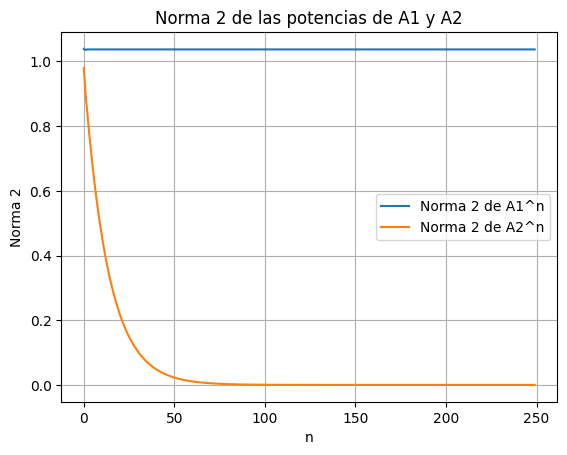

In [9]:
#Grafico:

plt.figure()
plt.plot(a1, label='Norma 2 de A1^n')
plt.plot(a2, label='Norma 2 de A2^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

### Consigna 3 -

In [10]:
#Primero definimos una función que realice el método de la potencia aplicando el método de Monte Carlo.

def metodo_potencia_MonteC(A,n):
    autovals_arr = np.zeros(n)

    for i in range (n):
        autovals_arr[i], _ = metodo_potencia(A)

    media = np.mean(autovals_arr)
    desvio_estandar = np.std(autovals_arr)

    return media, desvio_estandar


In [11]:
#Calculo Autovalores de A1 y A2

#A1:
a1, ds1 = metodo_potencia_MonteC(A1,250)
print(f'autovalor más grande de A1 :{a1}')


#A2
a2, ds2 = metodo_potencia_MonteC(A2,250)
print(f'autovalor más grande de A12 :{a2}')

#chequeo
#np.linalg.eigvals(A1)
#np.linalg.eigvals(A2)

autovalor más grande de A1 :1.0000001610940825
autovalor más grande de A12 :0.9276507075601551


### Consigna 4 -


In [12]:
#Utilizamos nuevamente las matrices del ejercicio 2:

data1 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
    ]

A1 = np.array(data1)

data2 = [
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
    ]

A2 = np.array(data2)



La ecuacion (4) es 

$$
\ (I-A)^{-1} = I + A + A^{2} + ... + A^{n} + ...
$$

In [13]:

def serie_de_potencias(A,n): #tal vez ineficiente, pero no me importa juaaaaaaa
    dim=np.shape(A)[0]
    
    v = np.zeros(n)
    e=np.zeros(n)

    L,U,P= calcularLU(np.eye(dim)-A)

    ImenosA_inversa=inversaLU(L, U, P)


    for i in range(n):
        serie= suma_potencias(A,i)
        v[i]=np.linalg.norm(serie, 2)
        e[i]=np.linalg.norm(serie-ImenosA_inversa,2)
    

    return v, e

    
    
def suma_potencias(A,n):
    dim=np.shape(A)[0]
    
    v = np.zeros(n+1)
    I = np.eye(dim)

    if n!=0:
        return elevar_matriz(A,n) + suma_potencias(A,n-1)
    else:
        return I


vA1,errorvA1=serie_de_potencias(A1,10)

vA2,errorvA2=serie_de_potencias(A2,10)

vA1_100,errorvA1_100=serie_de_potencias(A1,100)

vA2_100,errorvA2_100=serie_de_potencias(A2,100)

#print(errorvA2_100)



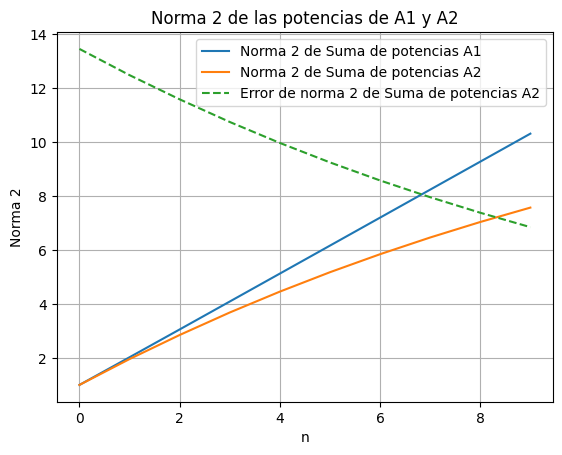

In [14]:
#Grafico para n=10:

plt.figure()
plt.plot(vA1, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

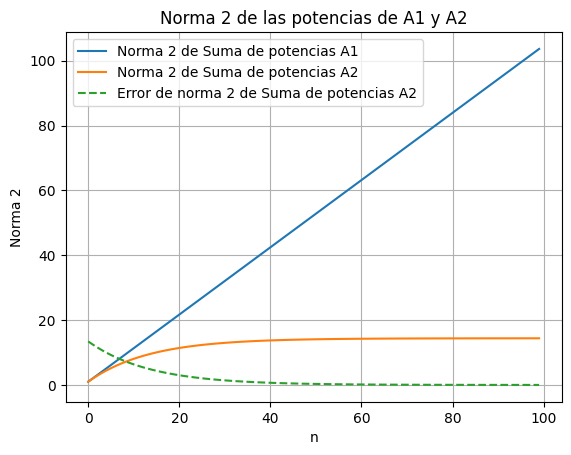

In [15]:
#Grafico para n=100:

plt.figure()
plt.plot(vA1_100, label='Norma 2 de Suma de potencias A1')
plt.plot(vA2_100, label='Norma 2 de Suma de potencias A2')
plt.plot(errorvA2_100, label='Error de norma 2 de Suma de potencias A2',linestyle="--")
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de A1 y A2')
plt.legend()
plt.grid()
plt.show()

(b) Podemos obvservar que, mientras que A2 luce converger alrededor del 17, la serie de potencias de A1 diverge. Aumentar el n solo hace que aumente la norma. (c) Con los datos que tenemos, pareciese que la convergencia de la serie de potencias esta relacionado con que la matriz elevada a la n (su norma) tienda a 0 cuando n tiende a infiinito.


###     Consigna 5 -

#### Cálculo autovalores de APP y ASS.

In [16]:
#APP:

APP_arr = APP.to_numpy()

a_PP,ds= metodo_potencia_MonteC(APP_arr,250)

print(f'Mayor autovalor de APP: {a_PP}')

#ASS

ASS_arr = ASS.to_numpy()

a_SS,ds= metodo_potencia_MonteC(ASS_arr,250)

print(f'Mayor autovalor de ASS: {a_SS}')

#chequeo
#np.linalg.eigvals(APP)
#np.linalg.eigvals(ASS)

Mayor autovalor de APP: 0.28265613224459984
Mayor autovalor de ASS: 0.2632669449555989


#### Calculamos vectores con la norma de la matriz elevada a i en la posición i y lo graficamos

In [17]:
a1 = vector_generator(APP_arr,250)

a2 = vector_generator(ASS_arr, 250)

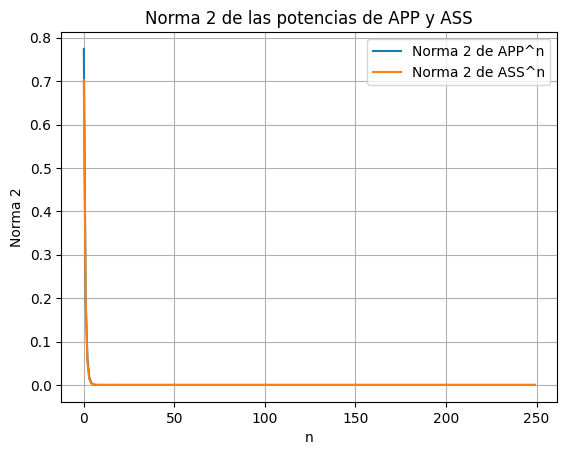

In [18]:
#Grafico de Normas.
plt.figure()
plt.plot(a1, label='Norma 2 de APP^n')
plt.plot(a2, label='Norma 2 de ASS^n')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de APP y ASS')
plt.legend()
plt.grid()
plt.show()

Se puede observar que las las normas de las matrices elevadas tienden a 0 a medida que aumenta el n. Por lo tanto,
según el argumento dado en el Punto 4, la serie de potencias convergerá.

#### Ahora calculamos y graficamos la serie de potencias.

In [19]:
#Primero calculamos los vectores con la serie de potencia hasta n en cada coordenada.

vAPP_100,errorvAPP_100=serie_de_potencias(APP_arr,100)

vASS_100,errorvASS_100=serie_de_potencias(ASS_arr,100)

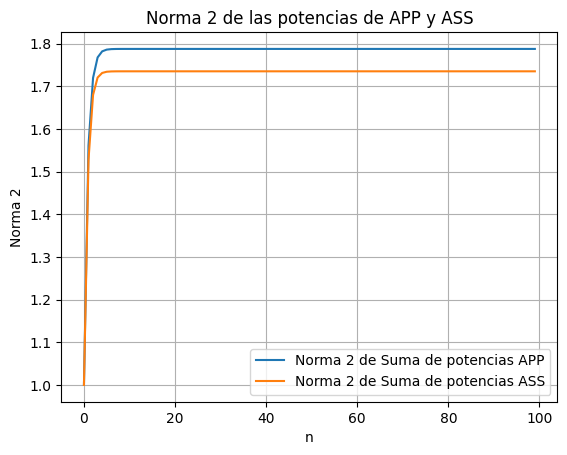

In [20]:
#Grafico:

plt.figure()
plt.plot(vAPP_100, label='Norma 2 de Suma de potencias APP')
plt.plot(vASS_100, label='Norma 2 de Suma de potencias ASS')
plt.xlabel('n')
plt.ylabel('Norma 2')
plt.title('Norma 2 de las potencias de APP y ASS')
plt.legend()
plt.grid()
plt.show()

Se puede observar en el gráfico que la suma de potencias converge.

### Consigan 6 -

$$
E_{n} = \begin{bmatrix}
1 - \frac{1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & 1-\frac{1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & 1-\frac{1}{n}
\end{bmatrix} \in \mathbb{R}^{n \times n}
$$

$\underline{\text{Ítem a:}}$

Notamos que $E_{n}$ es una matriz con todos sus elementos negativos, salvo los de la diagonal:

$$
E_{n}z =
\begin{bmatrix}
1 - \frac{1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & 1 - \frac{1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & 1 - \frac{1}{n}
\end{bmatrix}
\begin{bmatrix}
z_{1} \\
z_{2} \\
\vdots \\
z_{n}
\end{bmatrix} =
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{bmatrix}
$$

$$
x_{1} = \left(1 - \frac{1}{n}\right) z_{1} - \frac{1}{n} \left(\sum_{i=2}^{n} z_{i}\right)
$$

$$
x_{2} = -\frac{1}{n} z_{1} + \left(1 - \frac{1}{n}\right) z_{2} - \frac{1}{n} \left(\sum_{i=3}^{n} z_{i}\right)
$$

$$
x_{i} = -\frac{1}{n} \left(\sum_{j=1}^{i-1} z_{j}\right) + \left(1 - \frac{1}{n}\right) z_{i} - \frac{1}{n} \left(\sum_{j=i+1}^{n} z_{j}\right) = z_{i} - \frac{1}{n} \left(\sum_{j=1}^{n} z_{j}\right)
$$

Luego, el promedio de los elementos de $E_{n}z$ es:

$$
\frac{\sum_{i=1}^{n}\left(z_{i} - \frac{\sum_{j=1}^{n} z_{j}}{n}\right)}{n} =
$$

$$
\sum_{i=1}^{n} z_{i} - \sum_{i=1}^{n} \left(\frac{\sum_{j=1}^{n} z_{j}}{n}\right) =
$$

$$
\sum_{i=1}^{n} z_{i} - \sum_{i=1}^{n} \left(\frac{1}{n}\right) \sum_{j=1}^{n} z_{j} =
$$

$$
\sum_{i=1}^{n} z_{i} - \sum_{i=1}^{n} z_{i} = 0
$$

Sea $A$ una matriz cualquiera, $A \in \mathbb{R}^{n \times n}$.

Ahora vemos qué efecto tiene $E_{n}A$ sobre $A$:

$$
E_{n}A = 
\begin{bmatrix}
1 - \frac{1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & 1 - \frac{1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & 1 - \frac{1}{n}
\end{bmatrix}
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix}
$$

El promedio de las columnas es 0.

$E_{n}$ es un proyector.




$\underline{\text{Ítem b:}}$

Notamos que:

$\lambda = 1$ es un autovalor, pues:
$$
E_{n} - I = \begin{bmatrix}
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n}
\end{bmatrix}
$$

Tomamos $\{d_2, \ldots, d_n\}$ como una base de $\langle e \rangle^{\perp}$, tal que
$$
d_{i} = \begin{bmatrix}
-1\\
0\\
\vdots\\
1\\
0\\
\vdots\\
0
\end{bmatrix} \quad \longrightarrow \text{ posición } i,
$$
para $2 \leq i \leq n$.

Luego, para cada $i$:
$$
(E_{n} - I)d_{i} = 
\begin{bmatrix}
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{-1}{n} & \frac{-1}{n} & \cdots & \frac{-1}{n}
\end{bmatrix} 
\begin{bmatrix}
-1\\
0\\
\vdots\\
1\\
0\\
\vdots\\
0
\end{bmatrix} = 
\begin{bmatrix}
\frac{1}{n} - \frac{1}{n} \\
\frac{1}{n} - \frac{1}{n} \\
\vdots \\
\frac{1}{n} - \frac{1}{n}
\end{bmatrix} = 
\begin{bmatrix}
0\\
0\\
\vdots\\
0
\end{bmatrix}
$$

$\Rightarrow E_{\lambda=1} = \langle d_2, \ldots, d_n \rangle$, espacio de dimensión $n-1$.

Para $\lambda = 0$, tenemos:
$$
E_{n} 
\begin{bmatrix}
1\\
1\\
\vdots\\
1
\end{bmatrix} =
\begin{bmatrix}
1 - \frac{1}{n} \sum_{i=1}^{n} 1 \\
1 - \frac{1}{n} \sum_{i=1}^{n} 1 \\
\vdots \\
1 - \frac{1}{n} \sum_{i=1}^{n} 1
\end{bmatrix} =
\begin{bmatrix}
0\\
0\\
\vdots\\
0
\end{bmatrix}
$$

$\Rightarrow E_{\lambda=0} = \langle (1, 1, \ldots, 1) \rangle$, espacio de dimensión 1.

$\therefore$ Tenemos una base de autovectores de $\mathbb{R}^n$: $B = \{e, d_2, \ldots, d_n\}$, con $e$ asociado a $\lambda = 0$ y $d_{2}, \ldots, d_{n}$ asociados a $\lambda = 1$.





        


$\underline{\text{Ítem c:}}$
Queremos ver que:

 $E_{n}$ es un proyector 

 $\Leftrightarrow E_{n}^{2}=E_{n}$

 volviendo a la definición del enunciado 
 $$ E_{n} = I_{n} - \frac{1}{n} ee^{T} $$

 Donde $I_{n} \in \mathbb{R}^{n\times n}$ y $e\in \mathbb{R}^{n}$ un vector columna de todos unos

 Luego, $E_{n}^{2}=(I_{n} - \frac{1}{n} ee^{T})(I_{n} - \frac{1}{n} ee^{T})$

 $$
 = I_{n}^{2}- \frac{1}{n} ee^{T} - \frac{1}{n} ee^{T} + (- \frac{1}{n} ee^{T})^{2}
 $$

 llamo $B=ee^{T}\in \mathbb{R}^{n\times n}$

 $$
 =I_{n}- \frac{1}{n} B - \frac{1}{n} B + (- \frac{1}{n} B)^{2}
 $$

 $$
 = I_{n}- \frac{2}{n} B  + (- \frac{1}{n} B)^{2}
 $$

 Como $B= \begin{bmatrix}
1 & \cdots & 1 \\
1  & \cdots & 1 \\
\vdots  & \ddots & \vdots \\
1  & \cdots & 1
\end{bmatrix}$, $BB=B^{2}=\begin{bmatrix}
n & \cdots & n \\
n  & \cdots & n \\
\vdots  & \ddots & \vdots \\
n  & \cdots & n
\end{bmatrix}$

Retomando, 
$$
 = I_{n}- \frac{2}{n} B  + (- \frac{1}{n} B)^{2}= I_{n}- \frac{2}{n} B  + \frac{1}{n^{2}} nB
 $$

 $$
 =I_{n}- \frac{1}{n} B=I_{n} - \frac{1}{n} ee^{T}=E_{n}
 $$

  Como queriamos.

$\underline{\text{Ítem d:}}$

i) Falso, no es una matriz ortogonal.

Contraejemplo:

$$
E_{2}=\begin{bmatrix}
\frac{1}{2} & -\frac{1}{2} \\
-\frac{1}{2} & \frac{1}{2} \\
\end{bmatrix}
$$
si $E_{2}$ fuese ortogonal, $E_{2}^{2}=I$
pero, $E_{2}^{2}=\begin{bmatrix}
\frac{1}{2} & -\frac{1}{2} \\
-\frac{1}{2} & \frac{1}{2} \\
\end{bmatrix}$


ii)Verdadero, pues $E_{n}\begin{bmatrix}
1\\
1\\
\vdots\\
1\\
\end{bmatrix}= \vec{0}$



iii)Falso, no es definida positiva. 

Contraejemplo
$E_{2}$

$$
\begin{bmatrix}
\frac{1}{2} & \frac{1}{2}\\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{2} & -\frac{1}{2} \\
-\frac{1}{2} & \frac{1}{2} \\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{2} \\
 \frac{1}{2}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{1}{2} & \frac{1}{2}\\
\end{bmatrix}
\begin{bmatrix}
0 \\
0\\
\end{bmatrix}= \vec{0}
$$



iv)Verdadero; pues

traza($E_{n}$)=$\sum_{1}^{n}(1-\frac{1}{n})$=$\sum_{1}^{n}1-\sum_{1}^{n}\frac{1}{n}$=$n-1$




### Consigna 7 -

#### Primero normalizamos la matriz ASS y calculamos la matriz de covarianzas.

In [21]:
#Funcion para generar E_n:

def En_generator(n):
    E_n = np.eye(n) - np.ones((n, n)) * (1/n) 

    return E_n

E40 = En_generator(40)

In [22]:
#Normalizamos y calculamos cov.

ASSnorm = E40 @ ASS_arr

C = ASSnorm.T @ ASSnorm /(40-1)

#### Calculamos los dos primeros autovectores utilizando el Algoritmo de Hotelling.

In [23]:
def Hotelling (A, e):
    a1, v1 = metodo_potenciaH(A, e)

    A_prima = A - a1 * (v1 @ v1.T)
    a2, v2 = metodo_potenciaH(A_prima, e)

    return a1, v1, a2, v2

#### Ahora utilizamos la función Hotelling en C.

In [24]:
lambda1, v1, lambda2, v2 = Hotelling(C, 0.9999)

print(f'Mayor autovalor de C: {lambda1}')
print(f'Autovector asociado al mayor autovalor de C: {v1}')
print(f'Segundo mayor autovalor de C: {lambda2}')
print(f'Autovector asociado al segundo mayor autovalor de C: {v2}')

#Chequeo:
print(np.linalg.eigvals(C))
#print(np.linalg.eigvals(C - lambda1 * (v1 @ v1.T)))

Mayor autovalor de C: 0.010395205451782052
Autovector asociado al mayor autovalor de C: [[0.06722316]
 [0.06227475]
 [0.        ]
 [0.21534193]
 [0.18083468]
 [0.15115969]
 [0.21483121]
 [0.24680957]
 [0.21488146]
 [0.        ]
 [0.12054923]
 [0.11552985]
 [0.27151684]
 [0.0957978 ]
 [0.19411584]
 [0.38636654]
 [0.23177243]
 [0.1823954 ]
 [0.30659846]
 [0.16203589]
 [0.12301278]
 [0.09098468]
 [0.0821552 ]
 [0.07781792]
 [0.09097778]
 [0.        ]
 [0.09759972]
 [0.        ]
 [0.06274745]
 [0.04776577]
 [0.09261695]
 [0.09741512]
 [0.09185095]
 [0.08348426]
 [0.02954214]
 [0.2354752 ]
 [0.18023009]
 [0.12183599]
 [0.06873096]
 [0.17138622]]
Segundo mayor autovalor de C: 0.003012016049091945
Autovector asociado al segundo mayor autovalor de C: [[-0.13113546]
 [ 0.02721318]
 [ 0.        ]
 [ 0.08299477]
 [-0.52904383]
 [-0.33289614]
 [-0.53584843]
 [-0.218706  ]
 [ 0.05550953]
 [ 0.        ]
 [-0.03010143]
 [ 0.04347517]
 [ 0.07059865]
 [-0.27312912]
 [ 0.13870929]
 [ 0.13954216]
 [ 0.10

In [25]:
# nose como mostrar los vectores de una forma que quede lindo
#despues te explico crack ~ Giannis

### Consigna 8 -

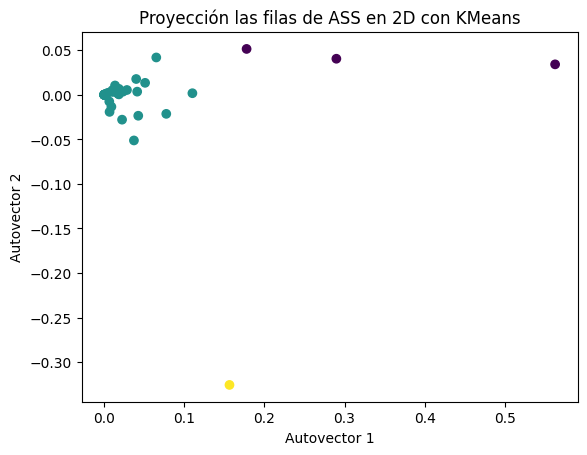

In [26]:
from sklearn.cluster import KMeans

#usamos los autovectores calculados en el punto anterior
autovector1 = v1
autovector2 = v2

# los convertimos en una matriz de 2x40
matriz2cols = np.column_stack((autovector1, autovector2))

ceros =np.zeros((40,38))
#llamo V a la matriz que tiene como primeras columas a los autovectores y el resto 0
V = np.column_stack((matriz2cols, ceros))
# proyectamos ASS
proyeccion = ASS_arr @ V
#print (proyeccion)

# Aplicamos KMeans para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit_predict(proyeccion)

# Graficamos los resultados
scatter = plt.scatter(proyeccion[:, 0], proyeccion[:, 1], c=clusters)
plt.title("Proyección las filas de ASS en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")
plt.show()

### CONSIGNA 10

In [27]:
#repetimos el analisis del punto 8)

#Primero vamos a tener que encontrar los autovectores de H. 

#Para ello, primero necesitamos H

def H_generator(A):
    I=np.eye(40)
    L,U,P = calcularLU(I-A)

    serie= inversaLU(L,U,P)

    H = serie - I

    return H

H=H_generator(ASS_arr)

#print(H)
#print(H.shape)
#print(np.linalg.eigvals(H))

In [28]:
#Buscamos los autovectores de H

Hnorm = E40 @ H

lambda1, v1H, lambda2, v2H = Hotelling(Hnorm, 0.9999)

print(f'Mayor autovalor de H: {lambda1}')
#print(f'Autovector asociado al mayor autovalor de C: {v1}')
print(f'Segundo mayor autovalor de C: {lambda2}')
#print(f'Autovector asociado al segundo mayor autovalor de C: {v2}')


Mayor autovalor de H: 0.2430667291950132
Segundo mayor autovalor de C: 0.16786204444466374


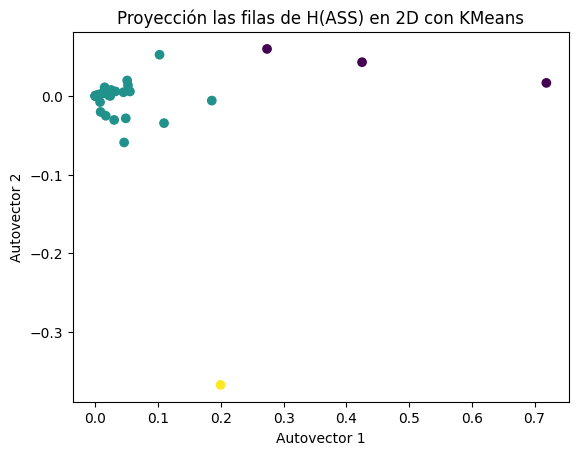

In [29]:
#usamos los autovectores encontrados
autovector1 = v1H
autovector2 = v2H


ceros =np.zeros((40,38))
#llamo V a la matriz que tiene como primeras columas a los autovectores y el resto 0
V = np.column_stack((matriz2cols, ceros))
# proyectamos ASS
proyeccion = H @ V
#print (proyeccion)

# Aplicamos KMeans para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit_predict(proyeccion)

# Graficamos los resultados
scatter = plt.scatter(proyeccion[:, 0], proyeccion[:, 1], c=clusters)
plt.title("Proyección las filas de H(ASS) en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")

plt.show()

In [30]:
#es muyyyyy parecido al de ASS normal... como analizo a q sectores pertenecen...

### CONSIGNA 11 CHAN


#### Calculemos las distancias al origen de cada punto de ASS.

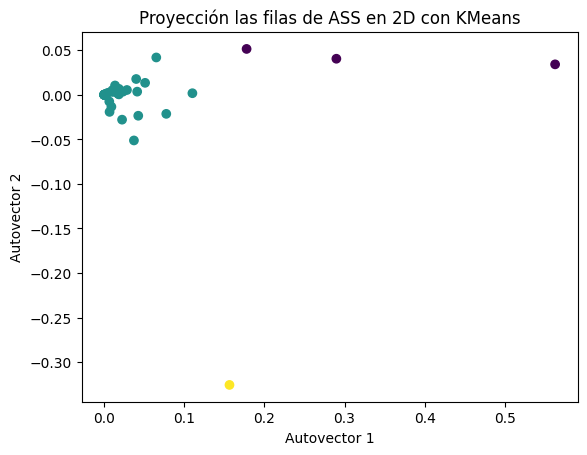

La distancia a 0 son: [3.61101116e-01 2.03184051e-02 0.00000000e+00 2.88976192e-02
 3.57320337e-02 6.32658909e-02 4.85881432e-02 1.61361836e-02
 1.19191710e-02 0.00000000e+00 4.13323228e-02 5.27748966e-02
 2.08343007e-03 9.84974544e-03 4.36741398e-02 1.59933095e-03
 5.16485370e-03 1.08797414e-02 8.26740707e-04 1.73557264e-02
 1.95731966e-02 1.70869476e-02 1.60509440e-03 1.27132152e-03
 1.83379621e-02 0.00000000e+00 3.68300791e-04 0.00000000e+00
 1.89666424e-04 1.69600956e-05 0.00000000e+00 0.00000000e+00
 1.13662321e-02 1.85034308e-01 2.37332290e-02 8.03759821e-02
 7.73177664e-02 1.10104934e-01 2.92611276e-01 5.63876814e-01]
La distancia max es 0.5638768144981464, de indice 39.
La distancia min es 0.0, de indice 2.


In [31]:

#despues pongo todo esto mejor pero para calcularlo aca a la vsita
autovector1 = v1
autovector2 = v2

# los convertimos en una matriz de 2x40
matriz2cols = np.column_stack((autovector1, autovector2))

ceros =np.zeros((40,38))
#llamo V a la matriz que tiene como primeras columas a los autovectores y el resto 0
V = np.column_stack((matriz2cols, ceros))
# proyectamos ASS
proyeccion = ASS_arr @ V
#print (proyeccion)



# Aplicamos KMeans para agrupar los datos en 3 clusters
kmeans = KMeans(n_clusters=3, random_state=4)
clusters = kmeans.fit_predict(proyeccion)

# Graficamos los resultados
scatter = plt.scatter(proyeccion[:, 0], proyeccion[:, 1], c=clusters)
plt.title("Proyección las filas de ASS en 2D con KMeans")
plt.xlabel("Autovector 1")
plt.ylabel("Autovector 2")
plt.show()


distancias_0 = np.linalg.norm(proyeccion,axis=1)
print("La distancia a 0 son:", distancias_0)

indice_max = np.argmax(distancias_0)
indice_min = np.argmin(distancias_0)

print(f'La distancia max es {distancias_0[indice_max]}, de indice {indice_max}.')

print(f'La distancia min es {distancias_0[indice_min]}, de indice {indice_min}.')

#para identificar estos puntos nos tendriamos que sortear a las filas 39 y 2 de ASS, y ver a q insumos se reifeiren

#### Graficamos la produccion de ASS y H para los sectores con distancia min y max.

In [32]:
#ASS:
sector_minASS = ASS_arr[2]
sector_maxASS = ASS_arr[39]

#H:
sector_minH = H[2]
sector_maxH = H[39]

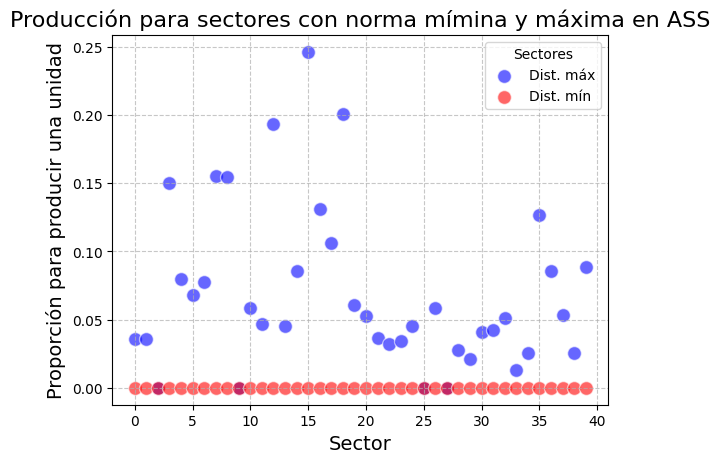

In [33]:
#Graficamos:

#Primero para ASS


plt.scatter(range(len(sector_maxASS)),sector_maxASS, c='blue',label='Dist. máx', alpha=0.6, edgecolors='w', s=100)
plt.scatter(range(len(sector_minASS)),sector_minASS, c='red',label='Dist. mín', alpha=0.6, edgecolors='w', s=100)

plt.title('Producción para sectores con norma mímina y máxima en ASS', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Proporción para producir una unidad', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sectores')
plt.show()

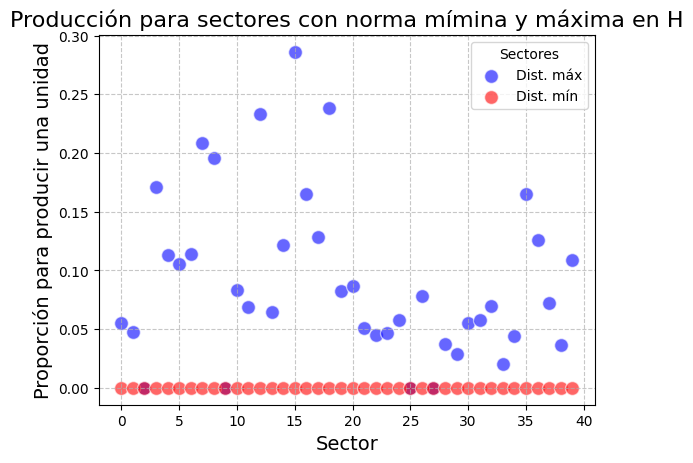

In [34]:
#Ahora para H:


plt.scatter(range(len(sector_maxH)),sector_maxH, c='blue',label='Dist. máx', alpha=0.6, edgecolors='w', s=100)
plt.scatter(range(len(sector_minH)),sector_minH, c='red',label='Dist. mín', alpha=0.6, edgecolors='w', s=100)

plt.title('Producción para sectores con norma mímina y máxima en H', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Proporción para producir una unidad', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sectores')
plt.show()

Observamos que el analisis de una producción nula no nos resulta interesante, por lo que vamos a ver que sucede con la distancia minima diferente de 0.

In [97]:

def minimo(lista):
    res = 0 #sera un indice

    ignorar = [2,9,25,27,30,31,29,28] #el indice que despreciamos para un mejor analisis, comentado abajo el problema
        
    for i in range(len(lista)):
        if lista[res] > lista[i] and (lista[i]!=0) and i not in ignorar:
            res = i
    
    return res

indice_min=minimo(distancias_0)
sector_minASS = ASS_arr[indice_min]
sector_minH = H[indice_min]

Como podemos ver en la funcion de arriba, tuvimos que ignorar 8 indices para que la linea que se formaba abajo por los puntos del sector rojo sea diferente a la funcion constantemente 0.

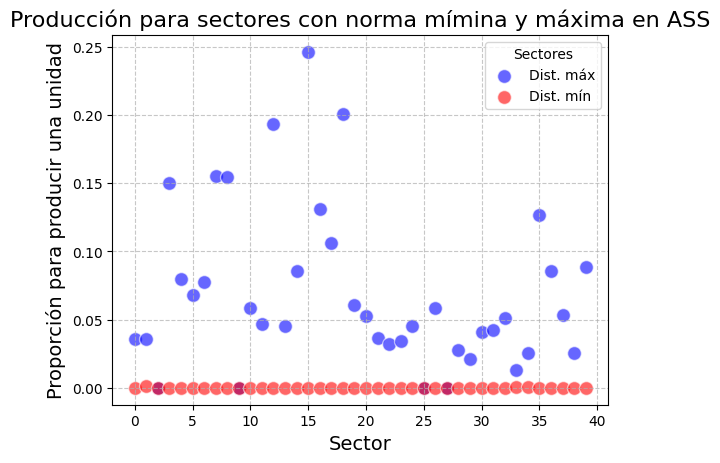

In [98]:
plt.scatter(range(len(sector_maxASS)),sector_maxASS, c='blue',label='Dist. máx', alpha=0.6, edgecolors='w', s=100)
plt.scatter(range(len(sector_minASS)),sector_minASS, c='red',label='Dist. mín', alpha=0.6, edgecolors='w', s=100)

plt.title('Producción para sectores con norma mímina y máxima en ASS', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Proporción para producir una unidad', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sectores')
plt.show()

#VER ESTO, AUN AGARRANDO LOS QUE SON DIF DE 0, LA COMPARACION ES UNA GARCHA

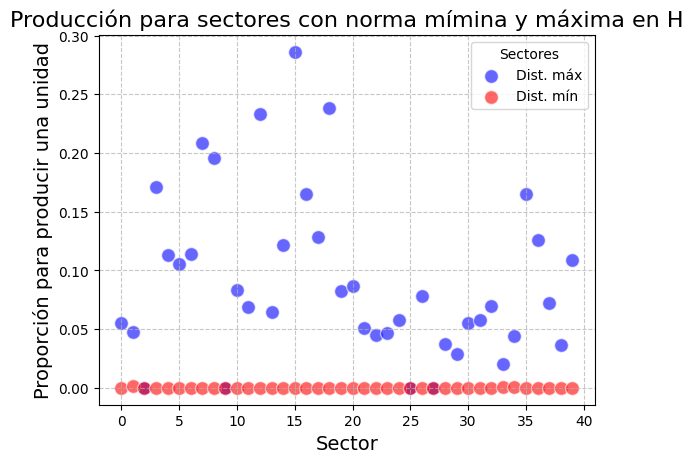

In [99]:
#y para H:


plt.scatter(range(len(sector_maxH)),sector_maxH, c='blue',label='Dist. máx', alpha=0.6, edgecolors='w', s=100)
plt.scatter(range(len(sector_minH)),sector_minH, c='red',label='Dist. mín', alpha=0.6, edgecolors='w', s=100)

plt.title('Producción para sectores con norma mímina y máxima en H', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Proporción para producir una unidad', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Sectores')
plt.show()

Recien con este indice obtuvimos una produccion con ligeros movimientos en la distancia minima que no sean 0 (segundo punto rojo). Todos los demas graficos graficaban los puntos en una linea recta donde toos los puntos tendian fuertemente al 0. 

Observamos entonces que las curvas que generan estos 2 sectores diferenciados tienen cierta tendencia. Por su lado, el sector rojo es una linea recta que varia levemente del 0 por sectores, mientras que el sector azul o de distancia maxima es mas volatil, teniendo puntos alejados del origen (punto 15) como cercanos (punto 25, que es 0). 

